In [23]:
import json
import warnings
warnings.filterwarnings('ignore')

In [24]:
file_name ='./data/sentiment/Books_small_10000.json'

reviews =[]
scores =[]


with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        #print(review['reviewText']
        #print(review['overall'])
        reviews.append(review['reviewText'])
        scores.append(review['overall'])

print('Total Reviews: ',len(reviews))
print('\nTotal Reviews: ',len(scores))
print(reviews[99])
scores[99]

Total Reviews:  10000

Total Reviews:  10000
Everybody Loves Raymond has become our FAVORITE show, so I bought this book for my husband for Christmas - he loved it! It was fun for him to read all the backstory about the show! Beautiful book arrived in perfect condition from Amazon - thank you! A+


5.0

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

In [26]:
data = {'Reviews':reviews,'Scores':scores}
df = pd.DataFrame(data=data)
df.head(3)

,Reviews,Scores
0,"I bought both boxed sets, books 1-5. Really a...",5.0
1,I enjoyed this short book. But it was way way ...,3.0
2,I love Nicholas Sparks. I&#8217;ve read everyt...,4.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Reviews    10000 non-null object
Scores     10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.3+ KB


In [28]:
df.Scores.value_counts()

5.0    5930
4.0    2448
3.0     978
2.0     375
1.0     269
Name: Scores, dtype: int64

In [29]:
# score <=  2,then ---- Negative

#score > 3 then ---- Positive

# score = 3 then  --- Neutral

def sentiment(score):
    if score <=2:
        return 0 #Negative
    elif score > 3:
        return 1 #positive
   

In [30]:
df['Sentiment'] = df['Scores'].apply(sentiment)

In [31]:
df.head(3)

,Reviews,Scores,Sentiment
0,"I bought both boxed sets, books 1-5. Really a...",5.0,1.0
1,I enjoyed this short book. But it was way way ...,3.0,NaN
2,I love Nicholas Sparks. I&#8217;ve read everyt...,4.0,1.0


In [32]:
df['Sentiment'].value_counts()

1.0    8378
0.0     644
Name: Sentiment, dtype: int64

In [33]:
df_pos = df[df['Sentiment']==1.0]
df_neg = df[df['Sentiment']==0.0]

In [34]:
df = pd.concat([df_pos,df_neg])

In [35]:
df.head(2)

,Reviews,Scores,Sentiment
0,"I bought both boxed sets, books 1-5. Really a...",5.0,1.0
2,I love Nicholas Sparks. I&#8217;ve read everyt...,4.0,1.0


In [36]:
df.Sentiment.value_counts()

1.0    8378
0.0     644
Name: Sentiment, dtype: int64

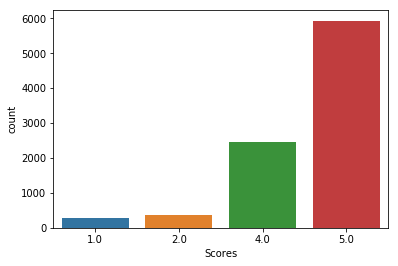

In [37]:
sns.countplot(df['Scores'])
plt.show()

In [38]:
df.Sentiment.value_counts()

1.0    8378
0.0     644
Name: Sentiment, dtype: int64

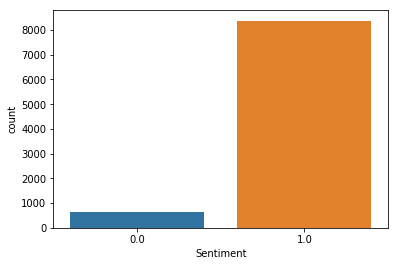

In [39]:
sns.countplot(df['Sentiment'])
plt.show()

In [40]:
STOP_WORDS = stopwords.words("english")

def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x

In [41]:
df['Reviews'] = df['Reviews'].apply(preprocess)

In [42]:
df.head(2)

,Reviews,Scores,Sentiment
0,i bought both boxed sets books 1 5 really a...,5.0,1.0
2,i love nicholas sparks i 8217 ve read everyt...,4.0,1.0


In [43]:
from sklearn.model_selection import StratifiedKFold


In [44]:
x = np.array(df['Reviews'])
y = np.array(df['Sentiment'])

In [45]:
skf = StratifiedKFold(shuffle=True,n_splits=2)
skf

StratifiedKFold(n_splits=2, random_state=None, shuffle=True)

In [46]:
for train_index,test_index in skf.split(x,y):
    x_train,x_test = x[train_index],x[test_index]
    y_train,y_test = y[train_index],y[test_index]

In [47]:
x_train.shape

(4511,)

In [48]:
x_test.shape

(4511,)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
count_vect= CountVectorizer()
train_vect = count_vect.fit_transform(x_train).toarray()
test_vect = count_vect.transform(x_test).toarray()


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,log_loss

In [104]:
C = [0.001,0.01,0.1,1.0,10,100,1000]
penalty=['l2','l1']
param_grid ={'C':C,'penalty':penalty}
param_grid


{'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'penalty': ['l2', 'l1']}

In [62]:
lr = LogisticRegression(class_weight='balanced')
grid_lr = GridSearchCV(lr,param_grid=param_grid,scoring='accuracy',cv=5)
grid_lr.fit(train_vect,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'penalty': ['l2', 'l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [66]:
print('Best Params:',grid_lr.best_params_)
print('\n Best Estimator:',grid_lr.best_estimator_)
print('\n Best Score:',grid_lr.best_score_)

Best Params: {'C': 100, 'penalty': 'l2'}

 Best Estimator: LogisticRegression(C=100, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

 Best Score: 0.9299490135225006


In [67]:
lr_bow = LogisticRegression(penalty=grid_lr.best_params_['penalty'],C=grid_lr.best_params_['C'],class_weight='balanced')
lr_bow.fit(train_vect,y_train)

LogisticRegression(C=100, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [68]:
bow_lr_predict = lr_bow.predict(test_vect)
print('Loss of LR:',log_loss(y_test,bow_lr_predict))

Loss of LR: 2.4118469741494724


In [70]:
print('Test Accuracy: ',accuracy_score(y_test,bow_lr_predict))
print('Train Accuracy:',accuracy_score(y_train,clf_log.predict(train_vect)))

Test Accuracy:  0.9301706938594546
Train Accuracy: 0.9975615162935048


In [74]:
cm = confusion_matrix(y_test,bow_lr_predict)
print(cm)

[[ 163  159]
 [ 156 4033]]


In [71]:
clf_log = LogisticRegression()
clf_log.fit(train_vect,y_train)
y_log_pred = clf_log.predict(test_vect)

In [72]:
print('Test Accuracy: ',accuracy_score(y_test,y_log_pred))
print('Train Accuracy:',accuracy_score(y_train,clf_log.predict(train_vect)))

Test Accuracy:  0.9443582354245178
Train Accuracy: 0.9975615162935048


In [75]:
cm = confusion_matrix(y_test,y_log_pred)
print(cm)

[[ 126  196]
 [  55 4134]]


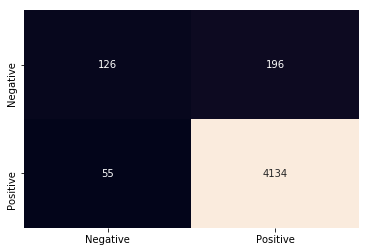

In [76]:
columns =['Negative','Positive']
index =['Negative','Positive']
dfcm = pd.DataFrame(cm,columns=columns,index=index)
sns.heatmap(dfcm,annot=True,fmt='g',cbar=False)
plt.show()

In [77]:
clf_log.predict([test_vect[100]])

array([1.])

In [78]:
clf_log.predict([test_vect[90]])

array([1.])

In [79]:
np.array(x_test)[90]

'i first read the rama series when it first was published and it is still a very interesting and thought provoking book after all these years '

In [80]:
np.array(y_test)[90]

1.0

# TF-Idf LR

In [103]:
tfidf = TfidfVectorizer()

train_tf = tfidf.fit_transform(x_train)
test_tf = tfidf.transform(x_test)


In [105]:
C = [0.001,0.01,0.1,1.0,10,100,1000]
penalty=['l2','l1']
param_grid ={'C':C,'penalty':penalty}
param_grid

{'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'penalty': ['l2', 'l1']}

In [106]:
lr = LogisticRegression(class_weight='balanced')
grid_lr = GridSearchCV(lr,param_grid=param_grid,scoring='accuracy',cv=5)
grid_lr.fit(train_tf,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'penalty': ['l2', 'l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [107]:
print('Best Params:',grid_lr.best_params_)
print('\n Best Estimator:',grid_lr.best_estimator_)
print('\n Best Score:',grid_lr.best_score_)

Best Params: {'C': 1000, 'penalty': 'l2'}

 Best Estimator: LogisticRegression(C=1000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

 Best Score: 0.9428064730658391


In [113]:
lr_tf = LogisticRegression(penalty=grid_lr.best_params_['penalty'],C=grid_lr.best_params_['C'],class_weight='balanced')
lr_tf.fit(train_tf,y_train)

LogisticRegression(C=1000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [114]:
lr_tf_predict = lr_tf.predict(test_tf)
print('Loss of LR:',log_loss(y_test,lr_tf_predict))

Loss of LR: 1.852919312687673


In [115]:
print('Test Accuracy: ',accuracy_score(y_test,lr_tf_predict))
print('Train Accuracy:',accuracy_score(y_train,lr_tf.predict(train_tf)))

Test Accuracy:  0.9463533584571049
Train Accuracy: 1.0


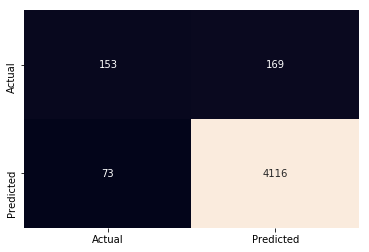

In [117]:
cm  = confusion_matrix(y_test,lr_tf_predict)
labels = ['Actual','Predicted']
c = pd.DataFrame(data=cm,index=labels,columns=labels)

sns.heatmap(c,annot=True,fmt='d',cbar=False)
plt.show()

# Naive Bayes/

In [82]:
alpha = [0.001,0.01,0.1,1.0,10,100,1000]
param_grid ={'alpha':alpha}
param_grid


{'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}

In [85]:
mnb = MultinomialNB()

In [86]:
#mnb = MultinomialNB(class_prior=0.5)
grid_mnb = GridSearchCV(mnb,param_grid=param_grid,scoring='accuracy',cv=5)
grid_mnb.fit(train_vect,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [89]:
print('Best Params:',grid_mnb.best_params_)
print('\n Best Estimator:',grid_mnb.best_estimator_)
print('\n Best Score:',grid_mnb.best_score_)

Best Params: {'alpha': 100}

 Best Estimator: MultinomialNB(alpha=100, class_prior=None, fit_prior=True)

 Best Score: 0.9286189315007759


In [90]:
mnb_bow = MultinomialNB(alpha=grid_mnb.best_params_['alpha'])
mnb_bow.fit(train_vect,y_train)

MultinomialNB(alpha=100, class_prior=None, fit_prior=True)

In [91]:
mnb_pred_bow = mnb_bow.predict(test_vect)
print('Test Accuracy: ',accuracy_score(y_test,mnb_pred_bow))
print('Train Accuracy:',accuracy_score(y_train,mnb_bow.predict(train_vect)))

Test Accuracy:  0.9286189315007759
Train Accuracy: 0.9286189315007759


In [94]:
cm = confusion_matrix(y_test,mnb_pred_bow)
print(cm)

[[   0  322]
 [   0 4189]]


#### Default

In [92]:

mnb.fit(train_vect,y_train)
mnb_pred = mnb.predict(test_vect)

In [93]:
print('Test Accuracy: ',accuracy_score(y_test,mnb_pred))
print('Train Accuracy:',accuracy_score(y_train,mnb.predict(train_vect)))

Test Accuracy:  0.9295056528485923
Train Accuracy: 0.946575038794059


In [95]:
cm = confusion_matrix(y_test,mnb_pred)
print(cm)

[[   8  314]
 [   4 4185]]


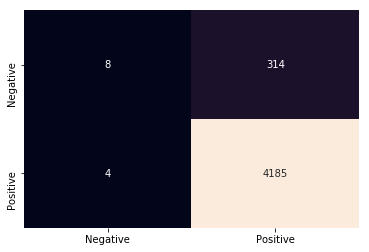

In [96]:
columns =['Negative','Positive']
index =['Negative','Positive']
df = pd.DataFrame(cm,columns=columns,index=index)
sns.heatmap(df,annot=True,fmt='g',cbar=False)
plt.show()

# SVM

In [98]:
from sklearn.svm import SVC

In [101]:
C = [0.001,0.01,0.1,1.0,10,100,1000]
kernal =['rbf','linear']
param_grid ={'C':C,'kernel':kernal}
param_grid


{'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'kernel': ['rbf', 'linear']}

In [102]:
svm = SVC()
grid_svm = GridSearchCV(svm,param_grid=param_grid,scoring='accuracy',cv=5)
grid_svm.fit(train_vect,y_train)

KeyboardInterrupt: 